# Iris metrics

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../') 

# Datasets
from sklearn.datasets import make_circles
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
# Multi-layer Perceptron
from nn.swarm_perceptron_qpso import perceptron 

In [2]:
n = 500 #register number

#generating the input X and output y (binary vector)
X_org, y_org = make_circles(n_samples=n, factor=0.1, noise=0.03, random_state=7)

print('Shape of X: ', X_org.shape)
print('Shape of y: ', y_org.shape)

data_name = 'circle'
training_type = ['individial_layers', 'exchange_layers','training_exchange_layers', 'training_exchange_layers_e']
algorithm = 'qdpso'

# normalize data (0,1)
t = MinMaxScaler()
t.fit(X_org)
X_org = t.transform(X_org)
# Split Dataset 80% for training and 20% for testing
X_train_aux, X_test_bal, y_train_aux, y_test_bal = train_test_split(X_org, y_org, test_size=0.2, random_state=100)
# Split Taining Dataset (80%) in training (87.5% of 80% => 70% of total) and validation(12.5% of 80% => 10% of total)
X_train_bal, X_val_bal, y_train_bal, y_val_bal = train_test_split(X_train_aux, y_train_aux, test_size=0.125, random_state=100)  
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")
print(f"Validation target statistics: {Counter(y_val_bal)}")
# Global variables
X_sample = len(X_train_bal)
X_input = len(X_train_bal[1])
X_class = len(np.unique(y_train_bal))
n_particulas = 100
max_iter = 20
n_training = 15
X_train = X_train_bal
y_train = y_train_bal
X_test = X_test_bal
y_test = y_test_bal
X_val = X_val_bal
y_val = y_val_bal
#---------------------------------------
# variable initialize for qpso algorithm
#---------------------------------------
beta = 1.13 #1.13
gBest_value = []
gBest = []
cost_test = []
cost_val = []
metric_train_hidden = []
metric_train_output = []

# load perceptron
nn = perceptron(X_sample, X_input, X_class)

Shape of X:  (500, 2)
Shape of y:  (500,)
Training target statistics: Counter({1: 183, 0: 167})
Testing target statistics: Counter({0: 58, 1: 42})
Validation target statistics: Counter({1: 25, 0: 25})


# Testing and Validation Value

In [3]:
parameters_ind = np.load(f"../output/{training_type[0]}/{data_name}/{algorithm}_{data_name}_gBest_113_{n_particulas}_{max_iter}_{X_input}.npy")
y_test_pred_ind = np.argmax(nn.forward(X_test, parameters_ind), axis=1)
cost_test_ind = mean_squared_error(y_test, y_test_pred_ind)
print ('>>> Test prediction cost with training: ', cost_test_ind)
y_val_pred_ind = np.argmax(nn.forward(X_val, parameters_ind), axis=1)
cost_val_ind = mean_squared_error(y_val, y_val_pred_ind)
print ('>>> Validation prediction cost with training: ', cost_val_ind)

>>> Test prediction cost with training:  0.42
>>> Validation prediction cost with training:  0.5


In [4]:
parameters_ex = np.load(f"../output/{training_type[1]}/{data_name}/{algorithm}_{data_name}_gBest_113_{n_particulas}_{max_iter}_{X_input}.npy")
y_test_pred_ex = np.argmax(nn.forward(X_test, parameters_ex), axis=1)
cost_test_ex = mean_squared_error(y_test, y_test_pred_ex)
print ('>>> Test prediction cost with training: ', cost_test_ex)
y_val_pred_ex = np.argmax(nn.forward(X_val, parameters_ex), axis=1)
cost_val_ex = mean_squared_error(y_val, y_val_pred_ex)
print ('>>> Validation prediction cost with training: ', cost_val_ex)

>>> Test prediction cost with training:  0.13
>>> Validation prediction cost with training:  0.24


In [5]:
parameters_ex_c = np.load(f"../output/{training_type[2]}/{data_name}/{algorithm}_{data_name}_gBest_113_{n_particulas}_{max_iter}_{X_input}.npy")
y_test_pred_ex_c = np.argmax(nn.forward(X_test, parameters_ex_c), axis=1)
cost_test_ex_c = mean_squared_error(y_test, y_test_pred_ex_c)
print ('>>> Test prediction cost with training: ', cost_test_ex_c)
y_val_pred_ex_c = np.argmax(nn.forward(X_val, parameters_ex_c), axis=1)
cost_val_ex_c = mean_squared_error(y_val, y_val_pred_ex_c)
print ('>>> Validation prediction cost with training: ', cost_val_ex_c)

>>> Test prediction cost with training:  0.05
>>> Validation prediction cost with training:  0.04


In [6]:
parameters_ex_c_ex = np.load(f"../output/{training_type[3]}/{data_name}/{algorithm}_{data_name}_gBest_113_{n_particulas}_{max_iter}_{X_input}.npy")
y_test_pred_ex_c_ex = np.argmax(nn.forward(X_test, parameters_ex_c_ex), axis=1)
cost_test_ex_c_ex = mean_squared_error(y_test, y_test_pred_ex_c_ex)
print ('>>> Test prediction cost with training: ', cost_test_ex_c_ex)
y_val_pred_ex_c_ex = np.argmax(nn.forward(X_val, parameters_ex_c_ex), axis=1)
cost_val_ex_c_ex = mean_squared_error(y_val, y_val_pred_ex_c_ex)
print ('>>> Validation prediction cost with training: ', cost_val_ex_c_ex)

>>> Test prediction cost with training:  0.0
>>> Validation prediction cost with training:  0.0


# Metrcis

(15, 21) (15, 21)


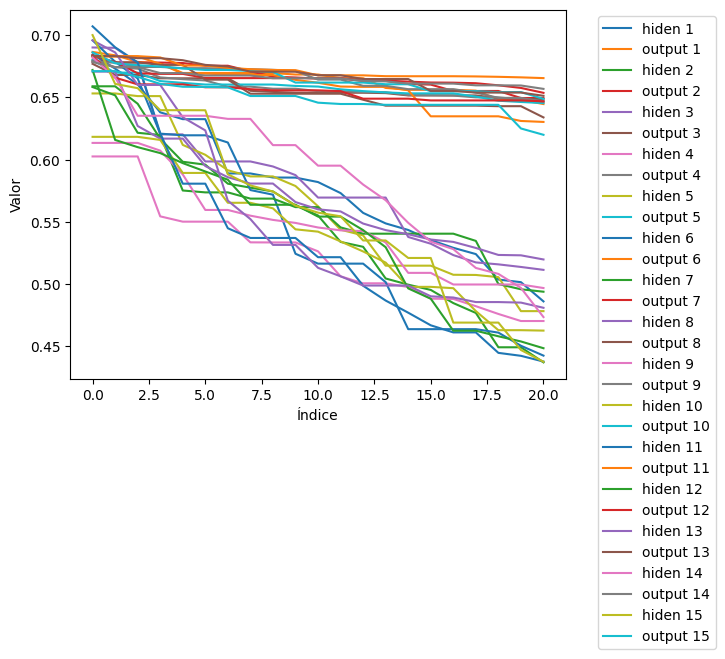

In [7]:
hidden_curve_ind = np.load(f"../output/{training_type[0]}/{data_name}/{algorithm}_{data_name}_metric_hidden_113_{n_particulas}_{max_iter}_{X_input}.npy")
output_curve_ind = np.load(f"../output/{training_type[0]}/{data_name}/{algorithm}_{data_name}_metric_output_113_{n_particulas}_{max_iter}_{X_input}.npy")
print(hidden_curve_ind.shape, output_curve_ind.shape)

for i in range(hidden_curve_ind.shape[0]):
    plt.plot(hidden_curve_ind[i, :], label=f'hiden {i+1}')
    plt.plot(output_curve_ind[i, :], label=f'output {i+1}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.show()


(2, 21)


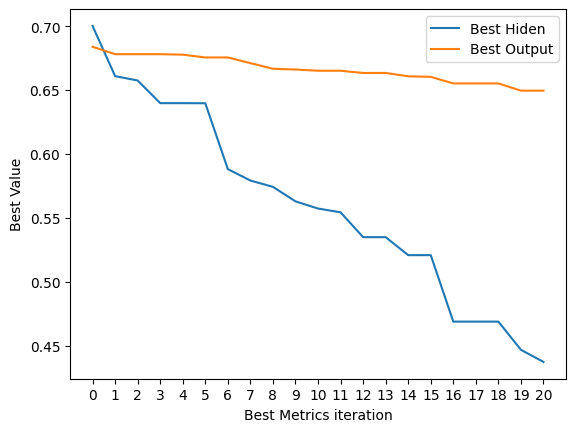

In [8]:
best_curve_ind = np.load(f"../output/{training_type[0]}/{data_name}/{algorithm}_{data_name}_gBestIter_113_{n_particulas}_{max_iter}_{X_input}.npy")
print(best_curve_ind.shape)

plt.plot(best_curve_ind[0], label= 'Best Hiden')
plt.plot(output_curve_ind[1], label= 'Best Output')

plt.legend()
plt.xlabel('Best Metrics iteration')
plt.ylabel('Best Value')

# Ajustar la escala del eje x para que vaya de 1 en 1
plt.xticks(np.arange(0, len(best_curve_ind[0]), 1))

plt.show()


(2, 21)


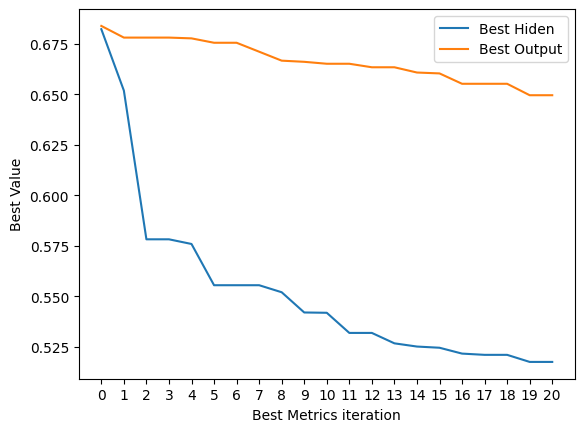

In [9]:
best_curve_ind = np.load(f"../output/{training_type[1]}/{data_name}/{algorithm}_{data_name}_gBestIter_113_{n_particulas}_{max_iter}_{X_input}.npy")
print(best_curve_ind.shape)

plt.plot(best_curve_ind[0], label= 'Best Hiden')
plt.plot(output_curve_ind[1], label= 'Best Output')

plt.legend()
plt.xlabel('Best Metrics iteration')
plt.ylabel('Best Value')

# Ajustar la escala del eje x para que vaya de 1 en 1
plt.xticks(np.arange(0, len(best_curve_ind[0]), 1))

plt.show()

(2, 21)


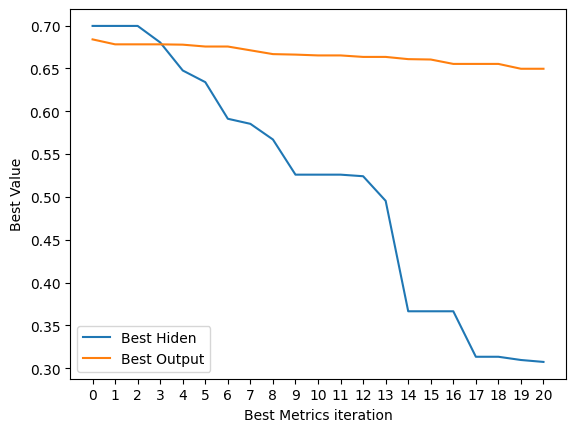

In [10]:
best_curve_ind = np.load(f"../output/{training_type[2]}/{data_name}/{algorithm}_{data_name}_gBestIter_113_{n_particulas}_{max_iter}_{X_input}.npy")
print(best_curve_ind.shape)

plt.plot(best_curve_ind[0], label= 'Best Hiden')
plt.plot(output_curve_ind[1], label= 'Best Output')

plt.legend()
plt.xlabel('Best Metrics iteration')
plt.ylabel('Best Value')

# Ajustar la escala del eje x para que vaya de 1 en 1
plt.xticks(np.arange(0, len(best_curve_ind[0]), 1))

plt.show()

(2, 21)


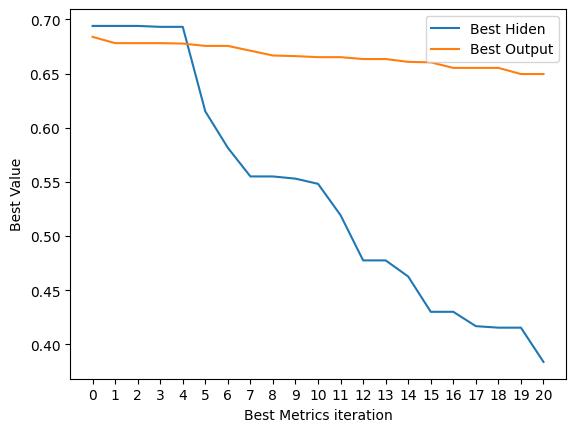

In [11]:
best_curve_ind = np.load(f"../output/{training_type[3]}/{data_name}/{algorithm}_{data_name}_gBestIter_113_{n_particulas}_{max_iter}_{X_input}.npy")
print(best_curve_ind.shape)

plt.plot(best_curve_ind[0], label= 'Best Hiden')
plt.plot(output_curve_ind[1], label= 'Best Output')

plt.legend()
plt.xlabel('Best Metrics iteration')
plt.ylabel('Best Value')

# Ajustar la escala del eje x para que vaya de 1 en 1
plt.xticks(np.arange(0, len(best_curve_ind[0]), 1))

plt.show()